In [1]:
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




In [2]:
# Preprocessing steps
def preprocess_tweet(tweet):
    # Remove URLs, special characters, and multiple whitespaces
    tweet = re.sub(r"http\S+|[^a-zA-Z0-9\s]|@\w+|#\w+", "", tweet)
    tweet = re.sub(r"\s+", " ", tweet)

    # Tokenization and stemming
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    stemmer = PorterStemmer()
    tokens = tokenizer.tokenize(tweet)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Remove stopwords and duplicates
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in stemmed_tokens if token not in stop_words]
    filtered_tokens = list(set(filtered_tokens))

    return " ".join(filtered_tokens)



In [3]:
# Load and preprocess COVID-19 tweets dataset
def load_dataset():
    # Load tweets from a file
    with open("covid_tweets.txt", "r", encoding="utf-8") as file:
        tweets = file.readlines()

    # Preprocess tweets
    preprocessed_tweets = [preprocess_tweet(tweet) for tweet in tweets]

    # Assign labels (positive/negative)
    labels = ["positive", "negative"] * (len(preprocessed_tweets) // 2)

    return preprocessed_tweets, labels



In [4]:
# Generate word cloud and heatmap visualization
def visualize_data(tweets):
    # Generate word cloud
    all_words = " ".join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()

    # Generate heatmap
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(tweets)
    heatmap = sns.heatmap(X.toarray(), cmap="Blues", xticklabels=vectorizer.get_feature_names(),
                          yticklabels=False)
    plt.title("Heatmap")
    plt.show()



In [5]:
# Train and test sentiment analysis model
def train_test_model(tweets, labels):
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

    # Vectorize tweets
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    # Train a random forest classifier
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train)

    # Predict labels for test set
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Test the model with a sample text
    sample_text = "Stay safe everyone. #COVID19"
    sample_text = preprocess_tweet(sample_text)
    sample_text_vectorized = vectorizer.transform([sample_text])

    # Predict sentiment for the sample text
    sample_text_sentiment = classifier.predict(sample_text_vectorized)[0]
    print("Sample Text Sentiment:", sample_text_sentiment)

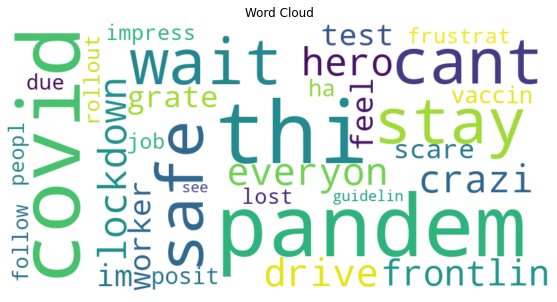

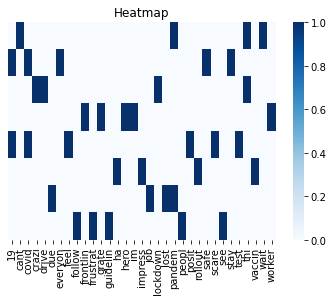

Accuracy: 0.0
Sample Text Sentiment: positive
Stay safe everyone. #COVID19


In [6]:
# Main program
if __name__ == "__main__":
    # Load and preprocess dataset
    tweets, labels = load_dataset()

    # Visualize data
    visualize_data(tweets)

    # Train and test model
    train_test_model(tweets, labels)
    sample_text = "Stay safe everyone. #COVID19"
    print(sample_text)
    